# Library

In [154]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

## Read data

In [155]:
df =pd.read_csv('healthcare-dataset-stroke-data.csv')

In [156]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [158]:
df.shape

(5110, 12)

In [159]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Remove column

In [160]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [161]:
df.drop(['id'],axis=1,inplace=True)

In [162]:
df.isna().sum().sort_values(ascending=False).head(5)

bmi              201
age                0
gender             0
hypertension       0
heart_disease      0
dtype: int64

In [163]:
df['bmi'].dtype

dtype('float64')

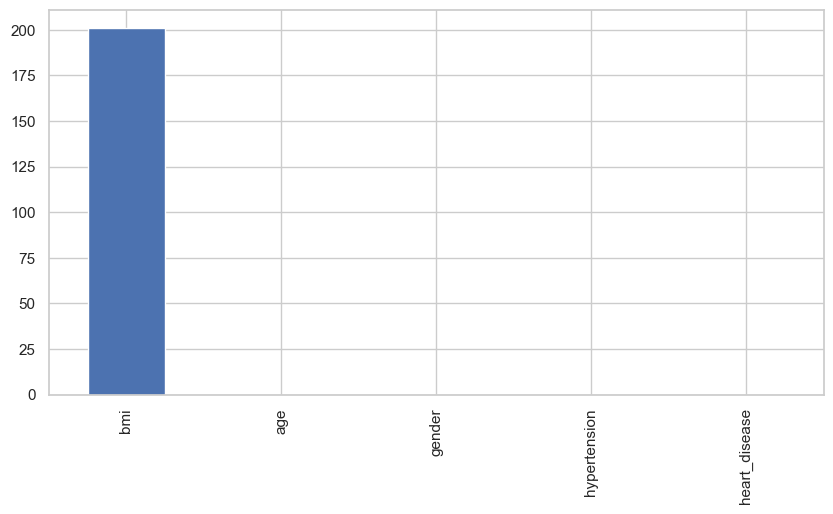

In [164]:
plt.figure(figsize=(10,5))
df.isna().sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.show()

## drop the Null values

In [165]:
df.dropna(subset=['bmi'],inplace=True)

In [166]:
df.reset_index(drop=True,inplace=True)

In [167]:
df.isnull().sum().sort_values(ascending=False)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 422.0+ KB


# Remove Duplicated

In [169]:
print("Number of duplicate rows : ",df.duplicated().sum())

Number of duplicate rows :  0


## Data_Visualization

## What is the age distribution of the patients?

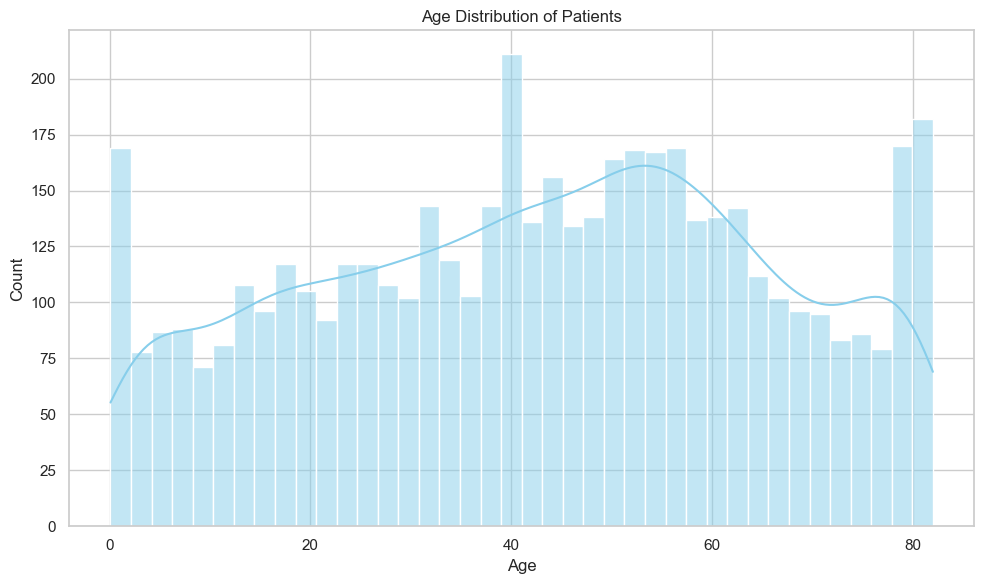

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=40, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## How does stroke occurrence vary by gender?

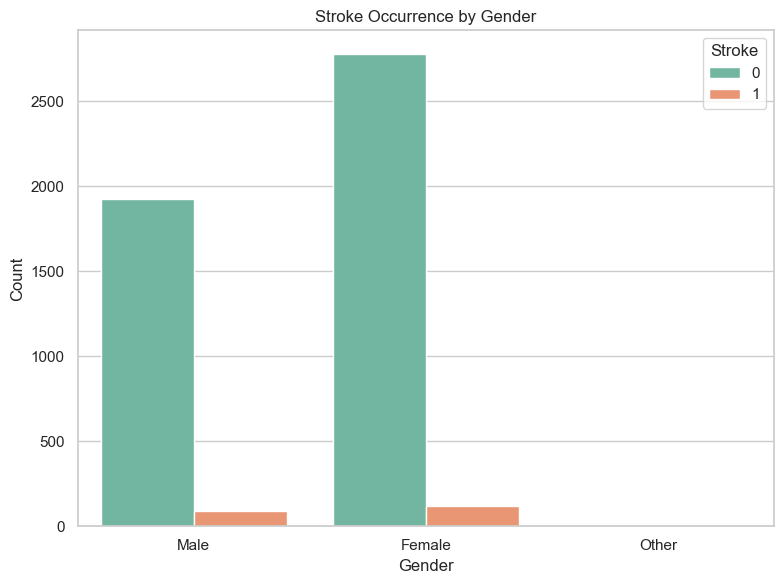

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set2')
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()


## Is there a relationship between glucose level and stroke?

C:\Users\Matrix Store\AppData\Local\Temp\ipykernel_12308\2284047195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='coolwarm')


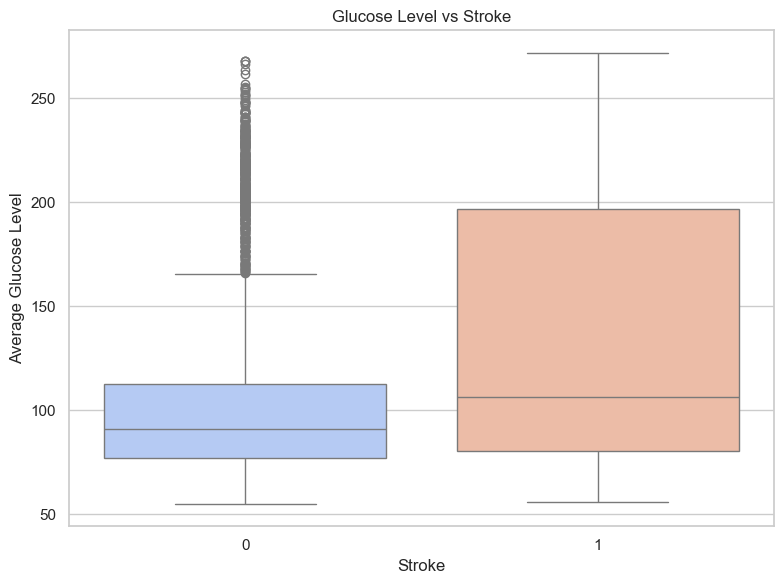

In [172]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='coolwarm')
plt.title('Glucose Level vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.tight_layout()
plt.show()


## What is the BMI distribution and how does it relate to stroke?

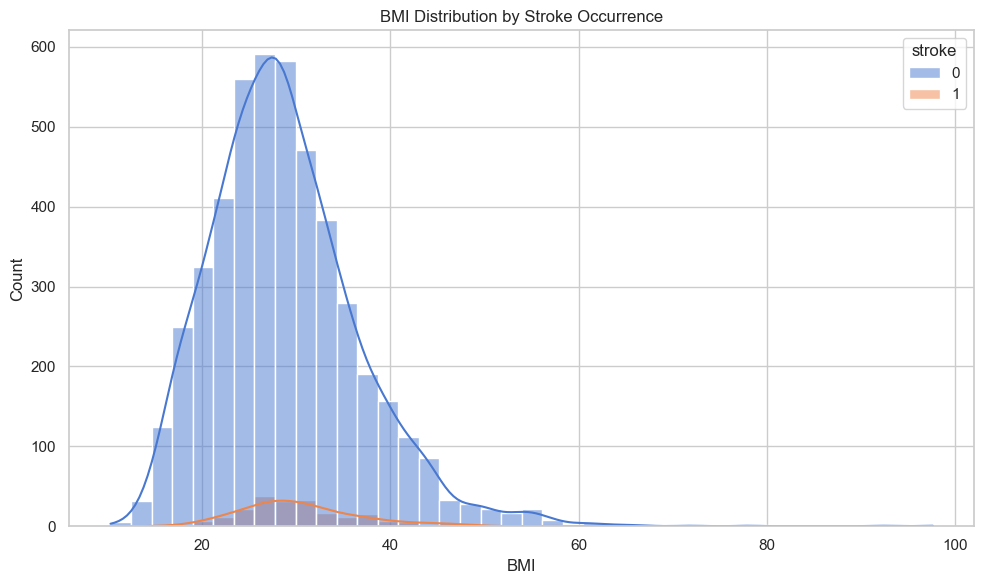

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=40, palette='muted')
plt.title('BMI Distribution by Stroke Occurrence')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## How does smoking status affect the probability of stroke?

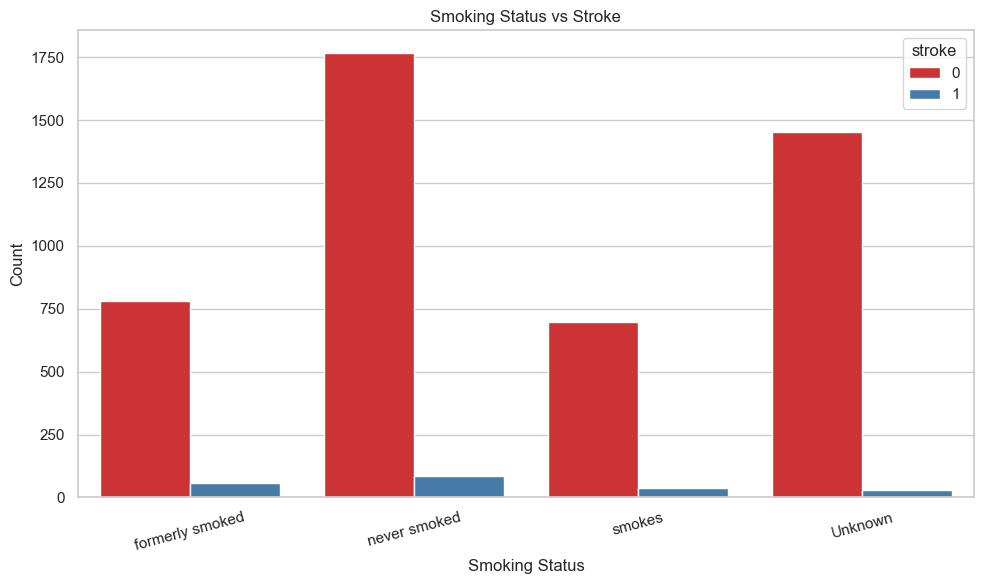

In [174]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='Set1')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## What is the correlation between numerical features?

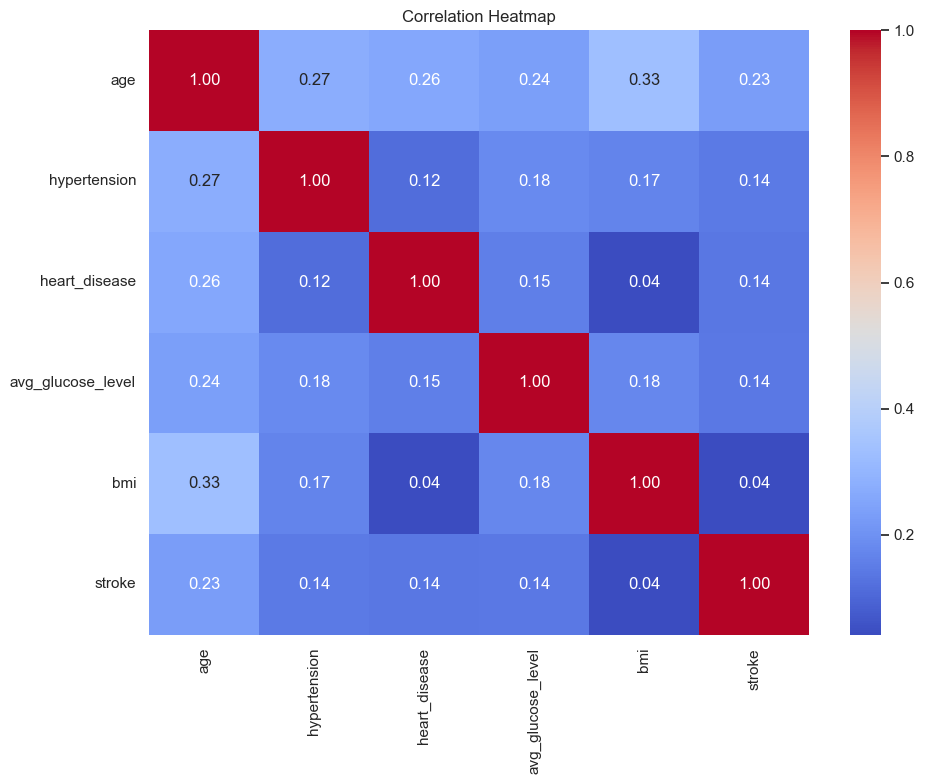

In [175]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## Does work type have an impact on stroke prevalence?

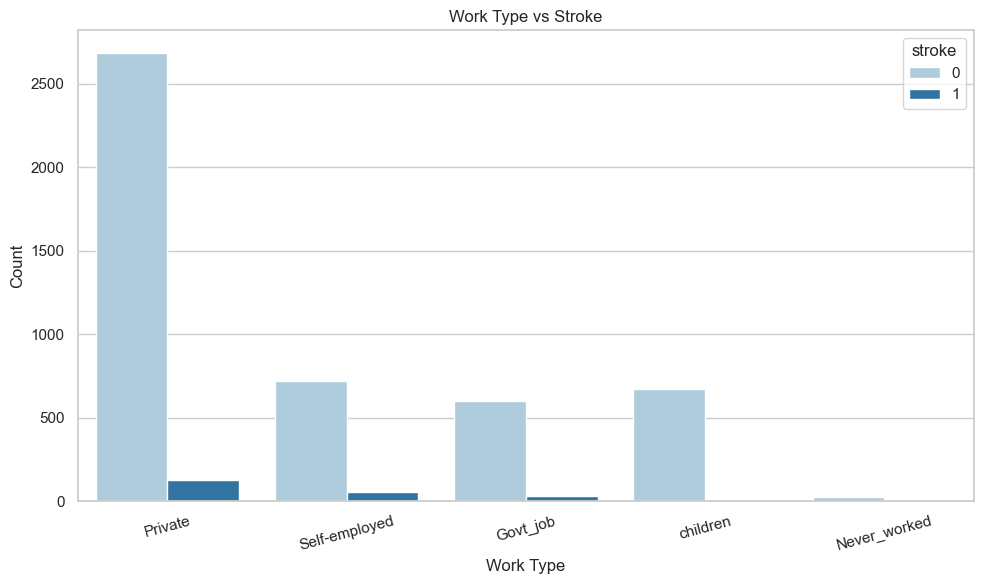

In [176]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke', palette='Paired')
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## What is the stroke rate in urban vs rural areas?

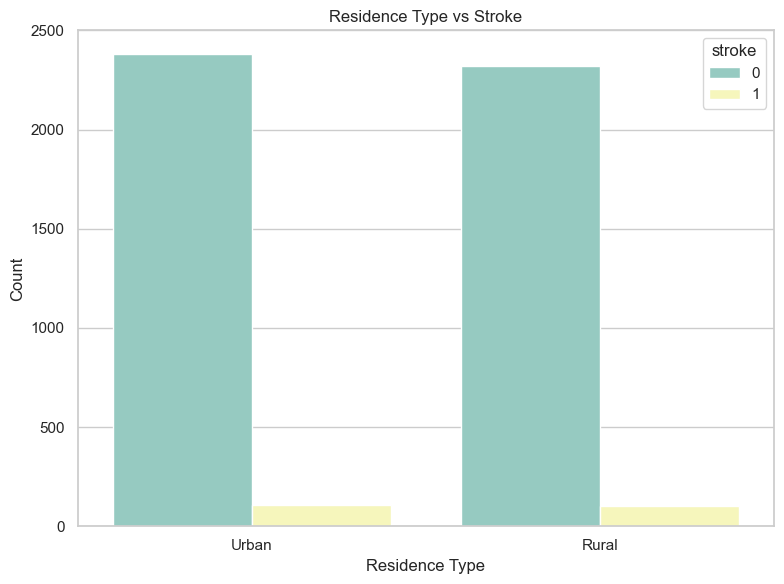

In [177]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Residence_type', hue='stroke', palette='Set3')
plt.title('Residence Type vs Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Data Encoding

In [178]:
for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column gender is :  3
number of column gender is :  ['Male' 'Female' 'Other']
number of column ever_married is :  2
number of column ever_married is :  ['Yes' 'No']
number of column work_type is :  5
number of column work_type is :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
number of column Residence_type is :  2
number of column Residence_type is :  ['Urban' 'Rural']
number of column smoking_status is :  4
number of column smoking_status is :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Label encoder

In [179]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['gender']=lb.fit_transform(df['gender'])
df['ever_married']=lb.fit_transform(df['ever_married'])

df['work_type']=lb.fit_transform(df['work_type'])
df['smoking_status']=lb.fit_transform(df['smoking_status'])


In [180]:
df['work_type']

0       2
1       2
2       2
3       3
4       2
       ..
4904    4
4905    3
4906    3
4907    2
4908    0
Name: work_type, Length: 4909, dtype: int64

## Get the feature names before encoding

In [181]:
feature_names = lb.classes_
print("Feature names before encoding:", feature_names)

Feature names before encoding: ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


## OneHotEconder

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(df[['Residence_type']]).toarray()
X.shape


(4909, 2)

In [183]:
onehotencoder.categories_[0]

array(['Rural', 'Urban'], dtype=object)

In [184]:
for index , col in enumerate(onehotencoder.categories_[0]) :
    df[col]=X[:,index]

In [185]:
df.drop(['Residence_type'],axis=1,inplace=True)

In [186]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Rural,Urban
0,1,67.0,0,1,1,2,228.69,36.6,1,1,0.0,1.0
1,1,80.0,0,1,1,2,105.92,32.5,2,1,1.0,0.0
2,0,49.0,0,0,1,2,171.23,34.4,3,1,0.0,1.0
3,0,79.0,1,0,1,3,174.12,24.0,2,1,1.0,0.0
4,1,81.0,0,0,1,2,186.21,29.0,1,1,0.0,1.0


In [187]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Rural,Urban
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,105.305150,28.893237,1.375433,0.042575,0.492768,0.507232
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,44.424341,7.854067,1.067322,0.201917,0.499999,0.499999
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,91.680000,28.100000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,113.570000,33.100000,2.000000,0.000000,1.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,271.740000,97.600000,3.000000,1.000000,1.000000,1.000000


In [188]:
y=df['stroke']
df.drop(['stroke'],axis=1,inplace=True)

In [189]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Make Balance For output values

<Axes: title={'center': 'stroke'}, xlabel='stroke'>

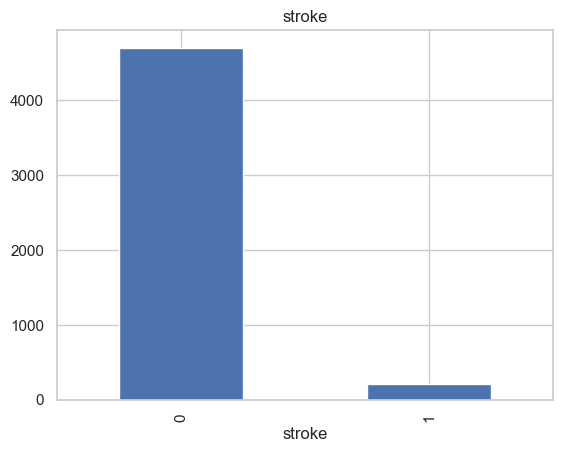

In [190]:
y.value_counts().plot.bar(title="stroke")

In [191]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state=42)
df,y = resampler.fit_resample(df, y)

<Axes: title={'center': 'stroke'}, xlabel='stroke'>

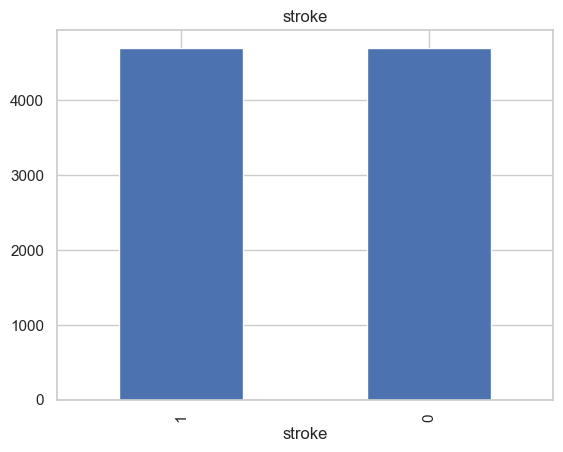

In [192]:
y.value_counts().plot.bar(title="stroke")

## Data Scaling ( Normalization)

## RobustScaler

In [193]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_scaler_robust=scaler.fit_transform(df)

In [194]:
print(y.value_counts(normalize=True))


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


In [195]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [196]:
df_scaler_robust.min(),df_scaler_robust.max()

(np.float64(-2.347522500067305), np.float64(8.73024583808814))

## Spliting Data

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_scaler_robust,y,test_size=0.20,random_state=42,stratify=y)

In [198]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7520, 11) (1880, 11) (7520,) (1880,)


In [199]:
X_test[0]

array([ 0.        ,  0.66981246,  0.        ,  0.        , -1.        ,
        0.        , -0.04616054, -0.87604453,  1.        , -0.15341707,
        0.15341707])

In [200]:
print(Y_test.value_counts(normalize=True))


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


In [201]:
df.loc[0]

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           1.00
work_type              2.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         1.00
Rural                  0.00
Urban                  1.00
Name: 0, dtype: float64

#KFold Spliting

In [202]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=4)
for i,(train_index,test_index) in enumerate(kf.split(df)):

    print(train_index)

    print(test_index)
    break

[2350 2351 2352 ... 9397 9398 9399]
[   0    1    2 ... 2347 2348 2349]


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tqdm import tqdm

In [204]:
Models={
    "LogisticRegression" : LogisticRegression(),
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    "SVC":SVC(kernel='sigmoid',gamma=0.02,C=1),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=20,min_samples_leaf=1, min_samples_split=5),
}

In [205]:
ModelName=[]
ModelAccuracy=[]
for namemodel,model in tqdm(Models.items()):
    model.fit(X_train,Y_train)
    ModelName.append(namemodel)
    y_pred=model.predict(X_test)
    ModelAccuracy.append([
        accuracy_score(Y_test,y_pred)
        ,precision_score(Y_test,y_pred)
        ,recall_score(Y_test,y_pred)
        ,f1_score(Y_test,y_pred)
    ])

Model_Accuracy=pd.DataFrame(ModelAccuracy,index=ModelName,columns=['accuracy','precision','recall','f1_score'])
Model_Accuracy

100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


,accuracy,precision,recall,f1_score
LogisticRegression,0.790426,0.774648,0.819149,0.796277
GaussianNB,0.780851,0.755814,0.829787,0.791075
KNeighborsClassifier,0.925000,0.891283,0.968085,0.928098
SVC,0.789362,0.769841,0.825532,0.796715
DecisionTreeClassifier,0.933511,0.931217,0.936170,0.933687


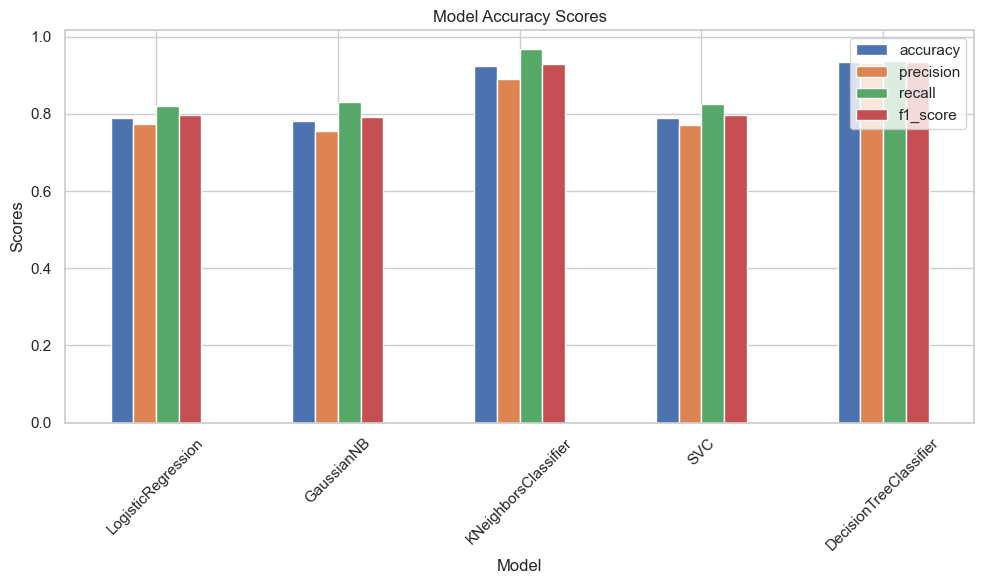

In [206]:
import matplotlib.pyplot as plt
Model_Accuracy.plot(kind='bar',figsize=(10,6))

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title("Model Accuracy Scores")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


In [207]:
best_index = Model_Accuracy['accuracy'].idxmax()
best_model_metrics = Model_Accuracy.loc[best_index]

print(f"\nBest Model: {best_index}")
print(best_model_metrics)



Best Model: DecisionTreeClassifier
accuracy     0.933511
precision    0.931217
recall       0.936170
f1_score     0.933687
Name: DecisionTreeClassifier, dtype: float64


### Train with best Model

In [208]:
model =Models[best_index]
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [209]:
with open('stroke_model.pkl', 'wb') as f:
    pickle.dump(model, f)

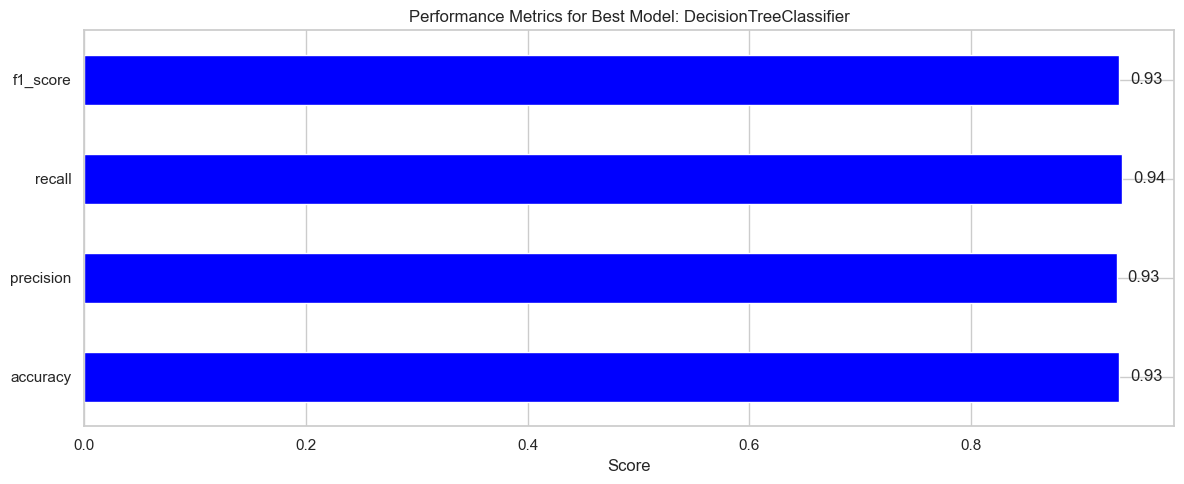

In [210]:
import matplotlib.pyplot as plt

best_index = Model_Accuracy['accuracy'].idxmax()
best_model_metrics = Model_Accuracy.loc[best_index]

plt.figure(figsize=(12, 5))
best_model_metrics.plot(kind='barh', color='blue')
plt.title(f'Performance Metrics for Best Model: {best_index}')
plt.xlabel('Score')
for i, v in enumerate(best_model_metrics):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


In [211]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = Models[best_index]
best_model.fit(X_train, Y_train)
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred_best)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[876  64]
 [ 53 887]]


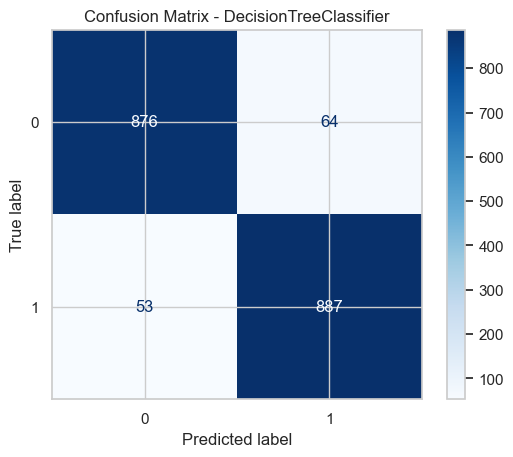

In [212]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_index}")
plt.show()